# Ensemble Learning: Bagging, Boosting, and Stacking

Once you have a nice baseline for your predictive model, it's hard to think of other ways to squeeze more juice out of it. This is where [Ensemble Learning](https://builtin.com/machine-learning/ensemble-model) comes in. **Ensemble Learning** is a machine learning approach that seeks better peformance by combining predictions from *multiple* models. When we have a baseline model, that model may not perform well due to high variance or high bias as we talked about in the last blog, but when we bring several models togehter, they can create a very strong learner. Ensemble methods are also fairly easy to use. The scikit-learn library makes it easy to implement them and there usually is little to no data preprocessing since many of the ensemble algorithms include processes that handle missing data. The three main types of ensemble learning are:

- [Bagging](https://www.ibm.com/topics/bagging#:~:text=the%20next%20step-,What%20is%20bagging%3F,be%20chosen%20more%20than%20once.)
- [Boosting](https://www.ibm.com/topics/boosting) 
- [Stacking](https://developer.ibm.com/articles/stack-machine-learning-models-get-better-results/)



Lets discuss and implement each one on our dataset boston housing dataset to understand how they work.

In [1]:
#import necessary packages for reading in and analyzing our dataset
import pandas as pd
import numpy as np
#Impute the column names 
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
           'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
#Read in our dataset and define our column names and delimiter so our dataframe looks nice)
bh = pd.read_csv('housing.data', delim_whitespace = True, header = None, names = columns)
bh.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
#Let define our features and our target
#We'll use all our features in the dataset so we will extract MEDV and define our features as X, and then define MEDV as y, the target
X = bh.drop('MEDV', axis =1)
y = bh['MEDV']
# Lets split our training set and our testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
#Now take a look at the distributions 
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354,)
Shape of y_test (152,)


## Bagging

Bagging is a type of ensemble modelling where several baseline models or 'weak' models are trained at the same time and are then combined to create a better model. 

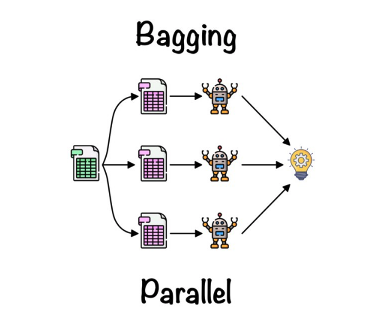

First bagging uses a resampling technique known as bootstrapping to randomly pick datapoints in the training data set and puts them into several different subsets. After the subsets have been created, it then trains each of them at the same time with baseline models. This is known as **Parallel Training**. Afterwards, the average of all of the outputs are taken to create a more accurate estimation model. Bagging is usually used to enhance baseline models that have high variance and low bias which tend to be models that have overfitting issues.

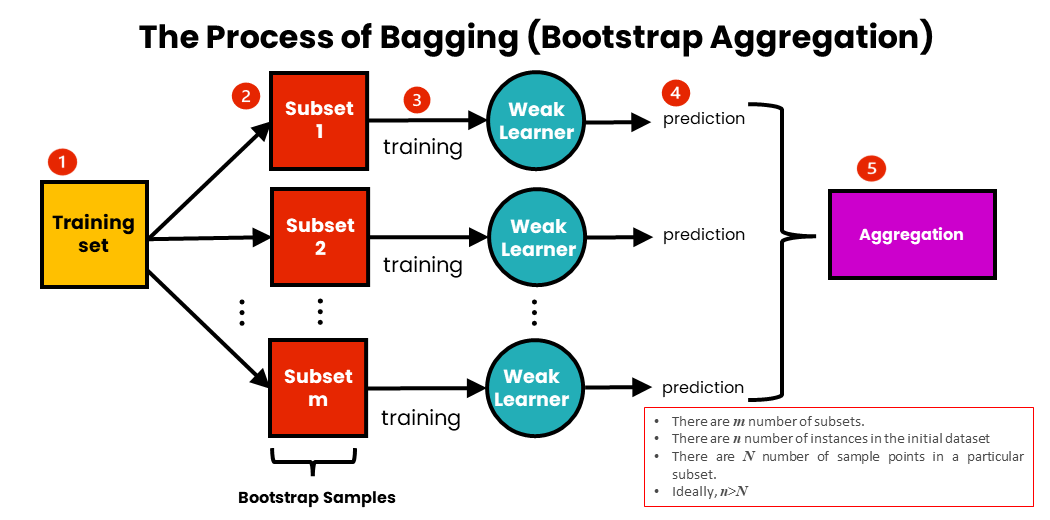

**Benefits of bagging include**:
- Reduction in variance and subsequently a reduction in overfitting
- It works well with both categorical and continuous values
- It will most likely yield a better overall model for your data

A very popular and extremely useful bagging algorithm is **Random Forest**. We'll use the Random Forest Regression algorithm  on our dataset to understand how bagging works

### Random Forest Algorithm for Regression Analysis 

The Random Forest Algorithm is a bagging algorithm that combines the functionalities of the [Decision Trees](https://www.cambridgespark.com/info/getting-started-with-regression-and-decision-trees) aglorithm and Bagging. For more on Decision Trees, click [here](https://www.cambridgespark.com/info/from-simple-regression-to-multiple-regression-with-decision-trees#:~:text=Decision%20trees%20can%20be%20used,the%20error%20and%20avoid%20overfit).
These are the steps for implementing the Random Forest model: 
- Step 1: A subset of data points and a subset of features is selected for constructing each decision tree. Simply put, n random records and m features are taken from the data set having k number of records.

- Step 2: Individual decision trees are constructed for each sample.

- Step 3: Each decision tree will generate an output.

- Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression, respectively.

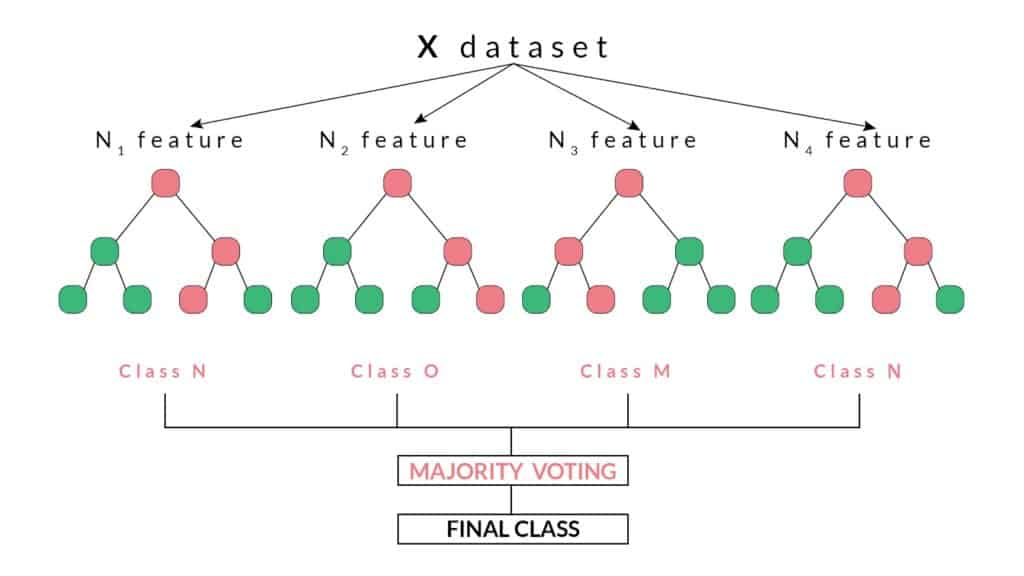

In [3]:
#Bring in RF model from sklearn and define rf model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
#train the model on our training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Predicting R2 Score the Train set results
y_pred_rf_train = rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set result
rmse_rf_train = (np.sqrt(mean_squared_error(y_train, y_pred_rf_train)))
rmse_rf_test = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('R2_score (train): ', r2_score_rf_train)
print('RMSE for training set is {}'.format(rmse_rf_train))
print('R2_score (test): ', r2_score_rf_test)
print("RMSE for test set is {}".format(rmse_rf_test))

R2_score (train):  0.9773763028723524
RMSE for training set is 1.4134376081749656
R2_score (test):  0.8612575946626428
RMSE for test set is 3.233214527492636


## Boosting

Boosting is an ensemble learning method that combines weak models together to create a strong learner that minimizes training errors. This sounds similar to Bagging, and foundationally it is, but there is one key difference. While bagging trains its models in parallel, boosting trains models **Sequentially**.

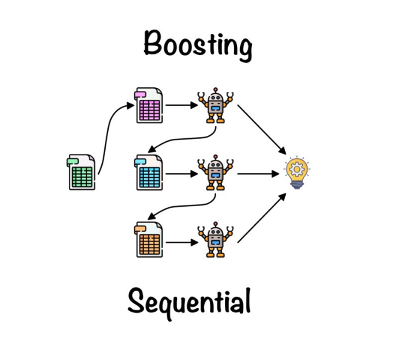

This means that a series of models are constructed and with each new model, the weights of the misclassified data in the previous model are changed to get better accuracy. This process helps the algorithm identify the key variables that it needs to focus on to improve its performance. Boosting is usually used for models that have low variance and high bias, which tend to be models experience underfitting issues.

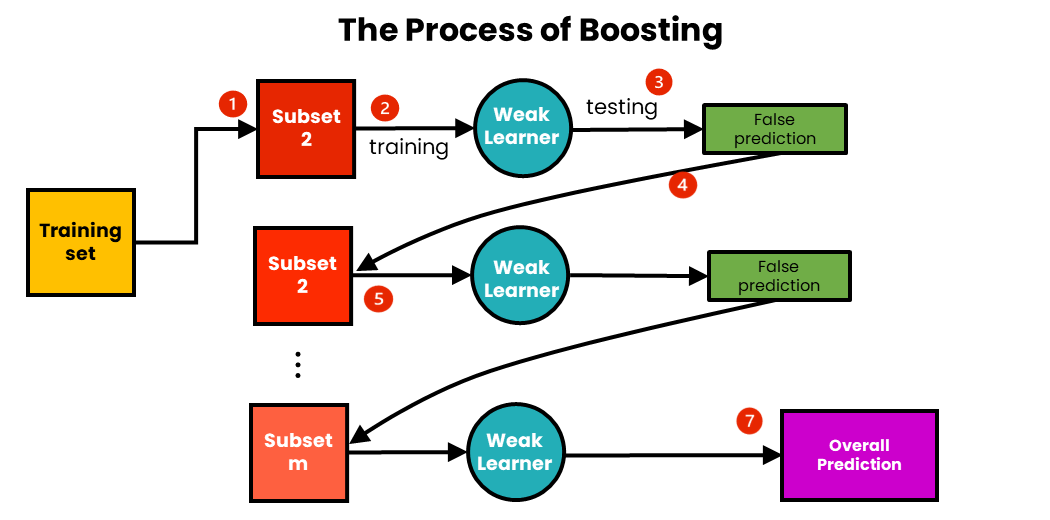

Popular types of boosting algorithms include:
- **AdaBoost(Adaptive Boosting)**:This method operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error. The model continues optimize in a sequential fashion until it yields the strongest predictor.  

- **Gradient Boosting**:This also works sequentially but unlike AdaBoost, Gradient Boosting trains on the residual errors of the previous predictor. The name, gradient boosting, is used since it combines the [gradient descent](https://www.ibm.com/topics/gradient-descent#:~:text=Gradient%20descent%20is%20an%20optimization,each%20iteration%20of%20parameter%20updates) algorithm and boosting method. 

- **XGBoost(Extreme Gradient Boosting)**: XGBoost is an implementation of gradient boosting that uses an ensemble of decision trees and gradient boosting to make predictions. XGBoost leverages multiple cores on the CPU, allowing for learning to occur in parallel during training.  

Lets test out the XGBoost algorithm on our boston housing dataset

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror')  #Our XGBoost model
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [8]:
# Predicting R2 Score the Train set results
y_pred_xgb_train = rf.predict(X_train)
r2_score_xgb_train = r2_score(y_train, y_pred_xgb_train)

# Predicting R2 Score the Test set results
y_pred_xgb_test = rf.predict(X_test)
r2_score_xgb_test = r2_score(y_test, y_pred_xgb_test)

# Predicting RMSE the Test set result
rmse_xgb_train = (np.sqrt(mean_squared_error(y_train, y_pred_xgb_train)))
rmse_xgb_test = (np.sqrt(mean_squared_error(y_test, y_pred_xgb_test)))
print('R2_score (train): ', r2_score_xgb_train)
print('RMSE for training set is {}'.format(rmse_xgb_train))
print('R2_score (test): ', r2_score_xgb_test)
print("RMSE for test set is {}".format(rmse_xgb_test))

R2_score (train):  0.9445743991372995
RMSE for training set is 2.20719685494909
R2_score (test):  0.9495325463753564
RMSE for test set is 1.9391973068772448


## Stacking

Boosting and Bagging are the most widely known and used ensemble methods, but another powerful ensemble method used in Machine Learning is **Stacking**. Stacking is a method that uses different types of models to learn some parts of a problem within a dataset. What stacking does is that it builds multiple different learners and use them to build an "intermediate prediction", one prediction for each learned model. Afterwards a new model, the final model, is then added to the framework. This model is stacked on top of the others and learns from each of the intermediate predictions to build the final prediction of the framework. This process will most likely give you a better model and might improve overall model performance

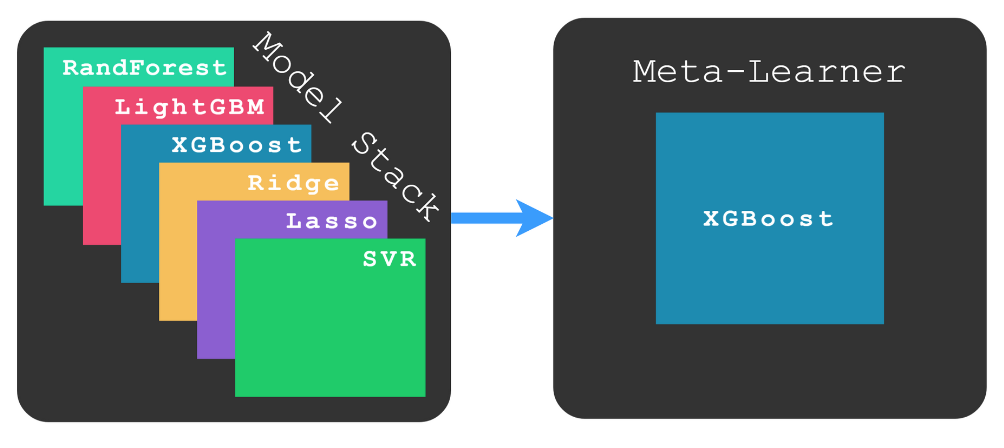

### Cross Validation

To perform stacking, a method called [**Cross Validation**](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) is required. This method is optional for bagging and boosting, but it is absolutely critical for stacking, so lets learn more about it. The gold standard for model evaluation in Machine Learning is train-test-split. You first split your data into two sets, the training set and the test set, train your model on the training set, then test it on the testing set to ensure your model works well on unseen data. This is done to check for overfitting. 

Now when doing evaluations on the testing set, there's a chance that your model could mold itself differently after being fit on the testing set, which could result in overfitting on other data brought in after the model is finalized. This is where the *validation* set comes in. With validation your data is split into three sets, the training set, the validation set, and the test set. This can work, but this can reduce the number of samples which can be sued for learning the model and the results are based on picking data points randomly, which could cause more overfitting issues down the line with unseen data. 

This is where cross validation comes in. When performing cross validation with stacking you first split your data into two sets, the training set and the holdout set. You then *further* split your training data into smaller sets(k sets). Each k subset is then further split *again* where you'll have training sets and a testing set for each k subset. You then bring in the models where one model would be used for each k subset. Once each model has been trained using the k subsets you'd then test them again on the holdout dataset. The average of the predictions for the test set in each k fold would be put into an array and added to the larger training set as a new feature and the same would be done for the holdout set, each getting a new feature added to it. The udpatd datasets would then be used to train the metalearner for the final predictions. 

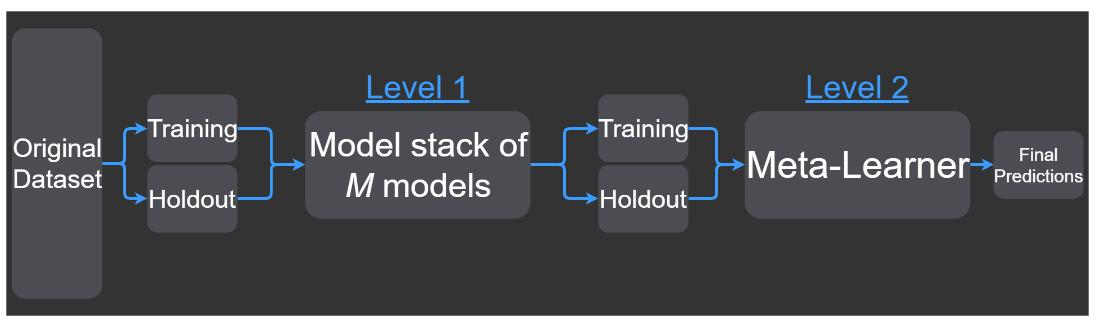

This is a step by step process of what Cross Validation looks like with stacking: 

- 1. Gather the models you'd like to use for your data (Random Forest, XGBoost)
- 2. Split your data set into a Training and Holdout Dataset 
- 3. For the training set, split the data into K subsets (k = 5 subsets) and for each subset
    - 3.1. For each iteration of K, split the subset into a training set and a test set
    - 3.2. Set your current model to train on the training set and then validate it on the test set
    - 3.3. After making predictions on the test set, collect all your predictions for each set and add them into a full_y_predict array
    - 3.4. Test the model again and make predictions on the Hold out set and call them holdout_pred
    - 3.5. Add full_y_predict as a feature on the training set and add holdout_pred as a feature in the hold out set
- 4. Return the Training set and the Holdout set with the new features and run them through your metalearner in the next layer to create your final predictions

We would predict one fold at a time, with a different model each time. 

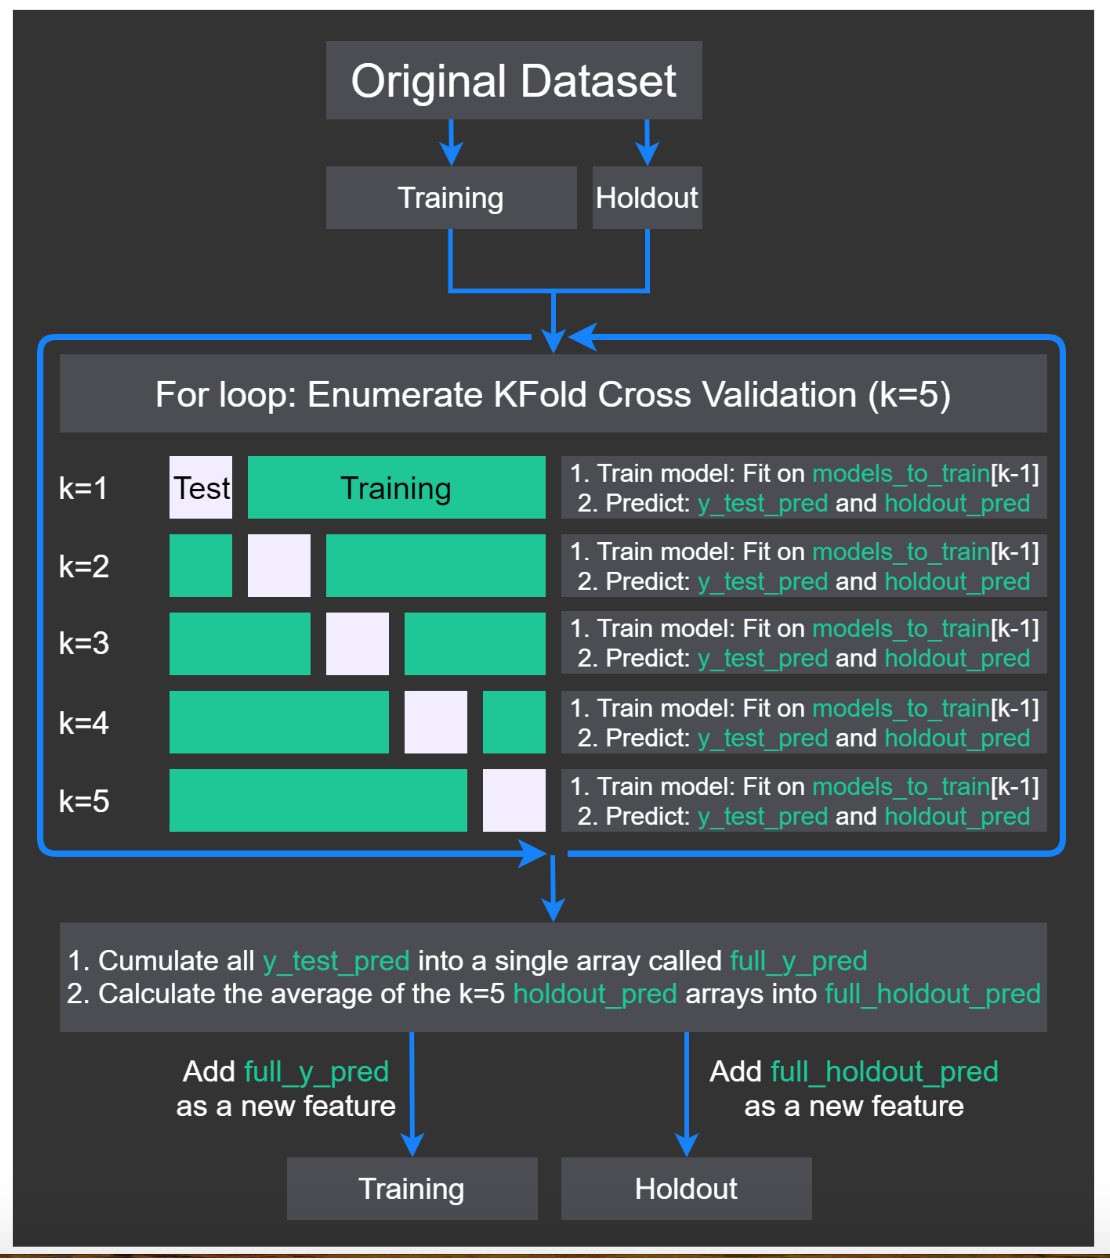

Lets actually implement model stacking using the 4 models we've used so far on our data set, Linear Regression, Random Forest, and XGBoost

In [9]:
!pip install mlxtend

In [10]:
X = bh.drop('MEDV', axis =1)
y = bh['MEDV']
# Lets split our training set and our testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
#Now take a look at the distributions 
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354,)
Shape of y_test (152,)


In [11]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

l_model = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [13]:
stack = StackingCVRegressor(regressors=(l_model,rf, xgb),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train.values, y_train.values)
pred = stack.predict(X_test.values)
rmse_stack = (np.sqrt(mean_squared_error(y_test, pred)))
score = r2_score(y_test, pred)
print(rmse_stack)
print(score)

2.9805527327196284
0.8820945727863594
